### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

### Importing the dataset and performing basic functions
*Health care dataset, which contains age, gender and other details of people which can be used to predict if the person experience stroke.*
*Dataset downloaded from: [Stroke prediction dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)*

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv') 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Cleaning the data by replacing the null values, and replacing the strings with numbers

In [5]:
df.drop("id", axis = 1, inplace = True)
gender = {'Male': 1,'Female': 2,'Other':3}
df.gender = [gender[item] for item in df.gender]
married = df['ever_married'].tolist()
married=set(married)
marry={}
temp=1
for i in married:
    marry[i]=temp
    temp+=1
df.ever_married = [marry[item] for item in df.ever_married]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,Private,Urban,228.69,36.6,formerly smoked,1
1,2,61.0,0,0,2,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,2,Private,Rural,105.92,32.5,never smoked,1
3,2,49.0,0,0,2,Private,Urban,171.23,34.4,smokes,1
4,2,79.0,1,0,2,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
work = df['work_type'].tolist()
work=set(work)
works={}
temp=1
for i in work:
    works[i]=temp
    temp+=1
df.work_type = [works[item] for item in df.work_type]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,2,Urban,228.69,36.6,formerly smoked,1
1,2,61.0,0,0,2,3,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,2,2,Rural,105.92,32.5,never smoked,1
3,2,49.0,0,0,2,2,Urban,171.23,34.4,smokes,1
4,2,79.0,1,0,2,3,Rural,174.12,24.0,never smoked,1


In [7]:
res = df['Residence_type'].tolist()
res=set(res)
ress={}
temp=1
for i in res:
    ress[i]=temp
    temp+=1
df.Residence_type = [ress[item] for item in df.Residence_type]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,2,1,228.69,36.6,formerly smoked,1
1,2,61.0,0,0,2,3,2,202.21,NaN,never smoked,1
2,1,80.0,0,1,2,2,2,105.92,32.5,never smoked,1
3,2,49.0,0,0,2,2,1,171.23,34.4,smokes,1
4,2,79.0,1,0,2,3,2,174.12,24.0,never smoked,1


In [8]:
smoke = df['smoking_status'].tolist()
smoke=set(smoke)
kings={}
temp=1
for i in smoke:
    kings[i]=temp
    temp+=1
df.smoking_status = [kings[item] for item in df.smoking_status]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,2,1,228.69,36.6,1,1
1,2,61.0,0,0,2,3,2,202.21,NaN,2,1
2,1,80.0,0,1,2,2,2,105.92,32.5,2,1
3,2,49.0,0,0,2,2,1,171.23,34.4,3,1
4,2,79.0,1,0,2,3,2,174.12,24.0,2,1


### Displaying an heatmap

<AxesSubplot:>

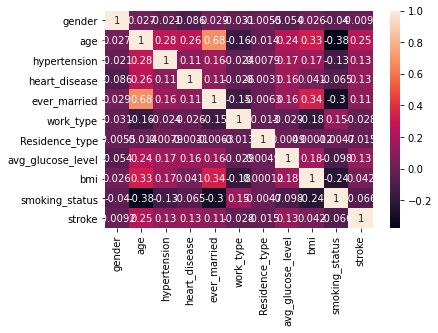

In [9]:
data_corr = df.corr()
sb.heatmap(data_corr,annot=True)

### Scatterplot against age and stroke

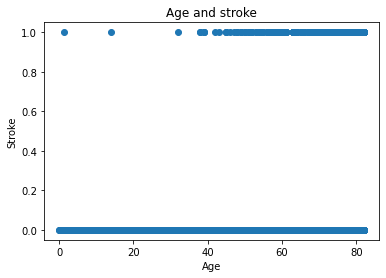

In [10]:
plt.scatter(df['age'],df['stroke'])
plt.title("Age and stroke")
plt.xlabel("Age")
plt.ylabel("Stroke")
plt.show()

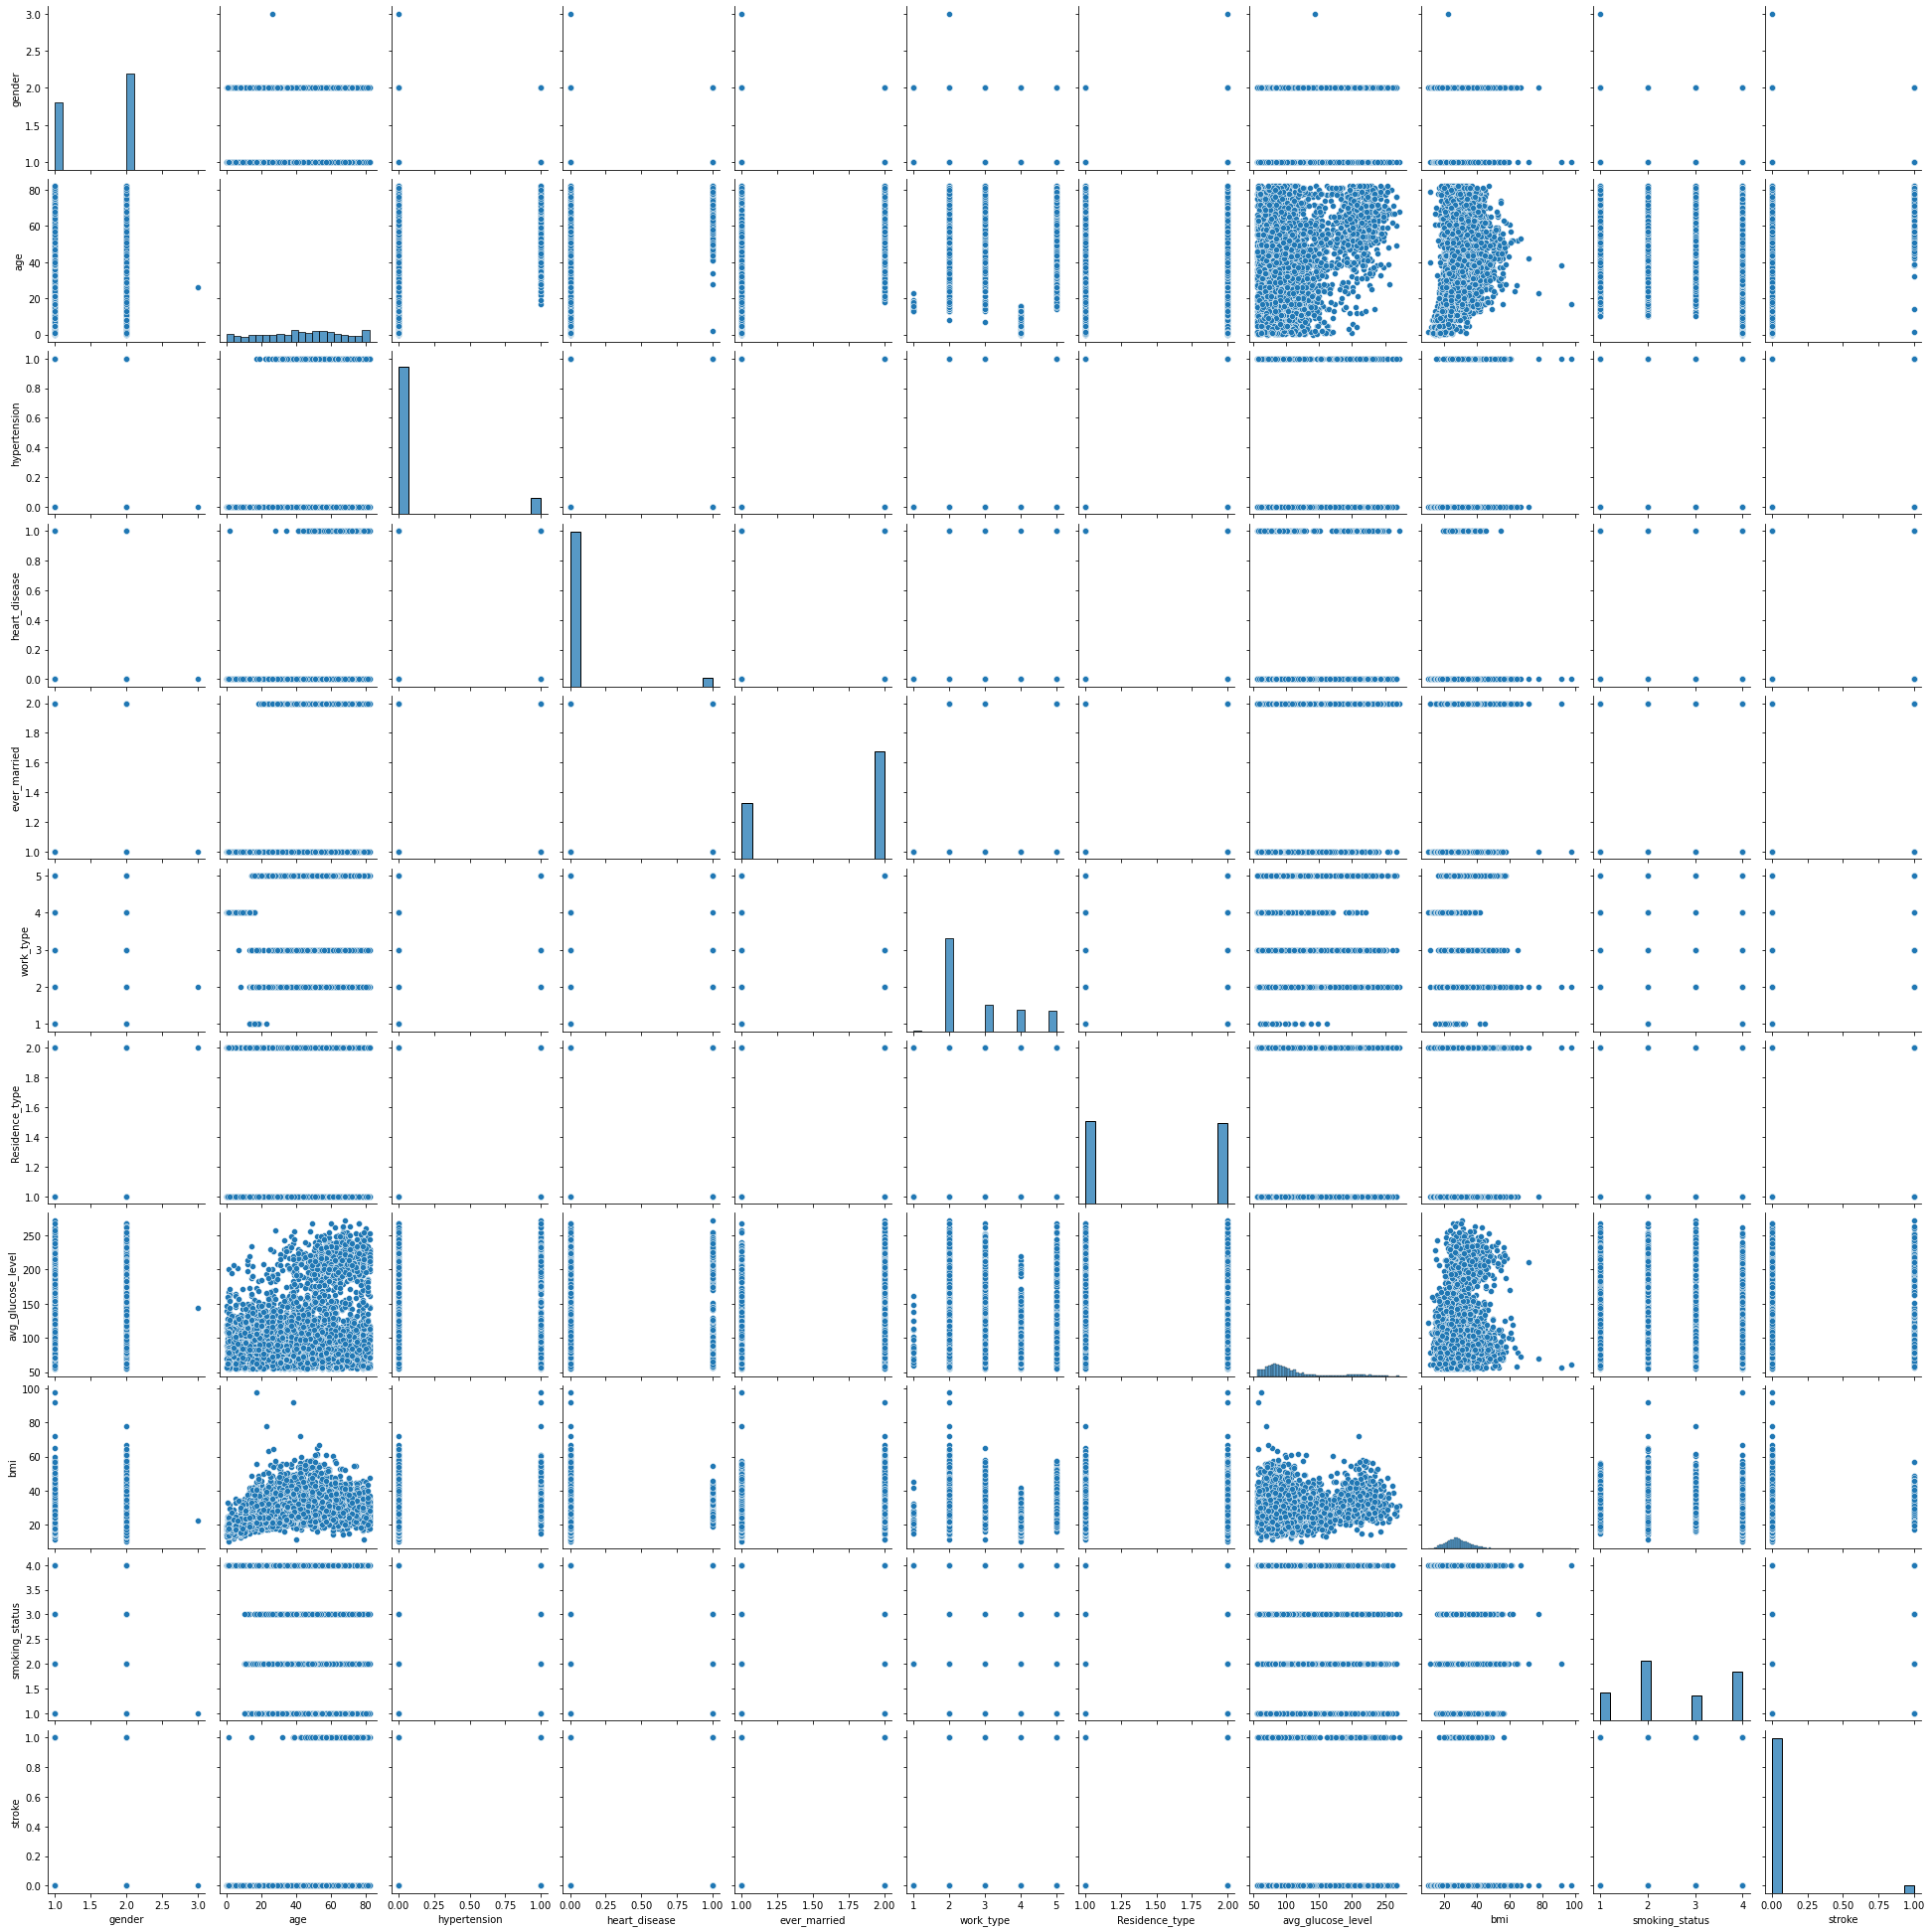

In [11]:
sb.pairplot(df)

### Correlation

In [12]:
print(df.corr())

                     gender       age  hypertension  heart_disease  \
gender             1.000000  0.027300     -0.021390      -0.085749   
age                0.027300  1.000000      0.276398       0.263796   
hypertension      -0.021390  0.276398      1.000000       0.108306   
heart_disease     -0.085749  0.263796      0.108306       1.000000   
ever_married       0.029366  0.679125      0.164243       0.114644   
work_type         -0.031304 -0.161106     -0.024468      -0.025830   
Residence_type    -0.005529 -0.014180      0.007913      -0.003092   
avg_glucose_level -0.054213  0.238171      0.174474       0.161857   
bmi                0.025658  0.333398      0.167811       0.041357   
smoking_status    -0.039693 -0.375845     -0.129012      -0.064671   
stroke            -0.009200  0.245257      0.127904       0.134914   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                 0.029366  -0.031304       -0.005529          -0.054213 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


### Clearing the null rows

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Dividing the training and testing data

In [15]:
x=df.drop('stroke',axis=1)
y=df['stroke']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [16]:
print(X_train.shape)
print(X_test.shape)

(3927, 10)
(982, 10)


### Scaling the data using MinMax Scalar

In [17]:
ms = MinMaxScaler()

In [18]:
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)
print(X_train)
print(X_test)

[[0.         0.45068359 0.         ... 0.10756163 0.22451317 0.33333333]
 [0.         0.95117188 0.         ... 0.80131105 0.27147766 1.        ]
 [0.5        0.37744141 0.         ... 0.15691072 0.47651775 0.66666667]
 ...
 [0.         0.64599609 0.         ... 0.09805189 0.2233677  1.        ]
 [0.5        0.65820312 0.         ... 0.39313083 0.3069874  0.        ]
 [0.5        0.98779297 0.         ... 0.2758748  0.09163803 0.        ]]
[[1.         0.69482422 0.         ... 0.23576923 0.10526316 0.66666667]
 [0.         0.89013672 0.         ... 0.22240385 0.38879457 0.33333333]
 [1.         0.57275391 0.         ... 0.49254808 0.2614601  0.33333333]
 ...
 [0.         0.18212891 0.         ... 0.11668269 0.2614601  1.        ]
 [1.         0.8046875  0.         ... 0.27620192 0.16468591 0.66666667]
 [1.         0.609375   0.         ... 0.07019231 0.09677419 0.        ]]


### Training the model using logistic regression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

### Testing the data against the model

In [21]:
print("Predictions:",predictions)
print("Testing data:",np.array(y_test))

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

### Prediction dataframe

In [22]:
df1 = pd.DataFrame({'Predictions': predictions, 'Test': np.array(y_test)}, columns=['Predictions','Test'])

In [23]:
df1.head()

,Predictions,Test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### Efficiency, accuracy, confusion matrix and other metrices

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
print(cm)

[[930   0]
 [ 52   0]]


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9470468431771895

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average=None)

array([1., 0.])

In [27]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average=None)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.94704684, 0.        ])

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average=None)

array([0.97280335, 0.        ])

In [29]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       930\n           1       0.00      0.00      0.00        52\n\n    accuracy                           0.95       982\n   macro avg       0.47      0.50      0.49       982\nweighted avg       0.90      0.95      0.92       982\n'

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2-score: %.2f (RMSE):" , r2_score(y_test, predictions) )

Mean Absolute Error: 0.05295315682281059
Mean Squared Error: 0.05295315682281059
Root Mean Squared Error: 0.23011552929520118
R2-score: %.2f (RMSE): -0.05591397849462343


### Prediction graph

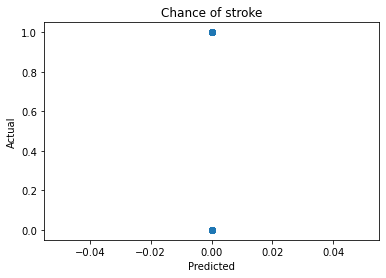

In [31]:
plt.scatter(predictions, y_test)
plt.title('Chance of stroke')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()